# COMS 4701 Summer 2021: Homework 1

**Instructions**: Solve all problems and type up your solutions in this notebook. Each solution should appear in a new cell immediately following the given problem. Written problems should include work and steps in addition to the answers; $\LaTeX$ is highly recommended, but plaintext is also acceptable if it is understandable. You are highly encouraged to read through the accompanying tutorial first if you are new to $\LaTeX$. Coding solutions should be free of errors, and outputs should be left in the notebook for submission.

All submitted work must be your own. Cases of academic dishonesty will be addressed following the policies outlined on the [course syllabus](https://courseworks2.columbia.edu/courses/131236).

# Problem 1: Diamond Hands (20 points)

Consider the problem of trading shares of a certain stock. We have many trader agents who must decide when to trade and how many shares to trade at any given time. Their decisions are based on individual risk levels, current market conditions, and inferences about company events (e.g., IPO, earnings reports, acquisition, etc.).

1. Give a state space description of this problem. What information should individual states contain? What are the actions that an agent can take in each state?

2. Classify this task environment according to the six properties discussed in class, and include a one- or two-sentence justification for each. For some of these properties, your reasoning may determine the correctness of your choice.

ENTER YOUR RESPONSES HERE

1. The state space is a set of possible states that the environment can be in. Each state should contain information on the agent's budget, the amount of stock they own, and the relevant decision making information (such as risk levels, the agent's budget, current market conditions, and inferences about company events). An agent can take the following actions in each state: trade x amount of shares, hold x amount of shares, and buy x amount of shares (i.e. buy, sell, or hold). 

2. a. Fully or partially observable? 
      **Partially observable** because the agent's sensors do not give it access to the complete state of the environment at each point in time. A trading agent can never have a perfect knowledge of the environment it is trading in. There will always be unpredictable factors such as market shocks or COVID-19 that will completely reshape the market and trading environment.

   b. Single-agent or multi-agent? 
      **Multi-agent** because decisions involve multiple agents. When trading shares of a stock, a trading agent's decision can affect another agent. Furthermore, if many agents are to make a certain decision, that can influence the price of shares of a company and the decision of a trading agent to trade shares of a stock or not.

   c. Deterministic or stochastic? **Stochastic** because the stock market is so complex that you can never predict the behavior of the stock market exactly. Nondeterministic elements such as randomly appearing market shocks or unreliable information exist. This prevents the next state of the environment from being completely determined by the current state and the action executed by the agent(s).

   d. Episodic or sequential? **Sequential** because the next episode depends on actions taken in previous episodes. Likewise, a trading agent's current decision is dependent on previous decisions such as whether the agent has already traded an amount of shares of a stock. 

   e. Static or dynamic? **Dynamic** because the environment can change while an agent is deliberating. The economy and stock market are both dynamic entities that do not stand still ever. There is consist shifts and changes that do not stop while an agent is making their decision.

   f. Discrete or continuous? **Continuous** because there is not a finite number of distinct states or a discrete set of percpts and actions. Trading agents take various factors into consideration when deciding whether to trade shares or not. Also, the state of the market, current market conditions, and risk levels sweep through a range of continuous values over time.

# Problem 2: Search Practice (20 points)

In the state space graph below, S is the start state and G is the goal state. Costs are shown along edges and heuristic values are shown adjacent to each node. Assume that search algorithms expand states in alphabetical order when ties are present.

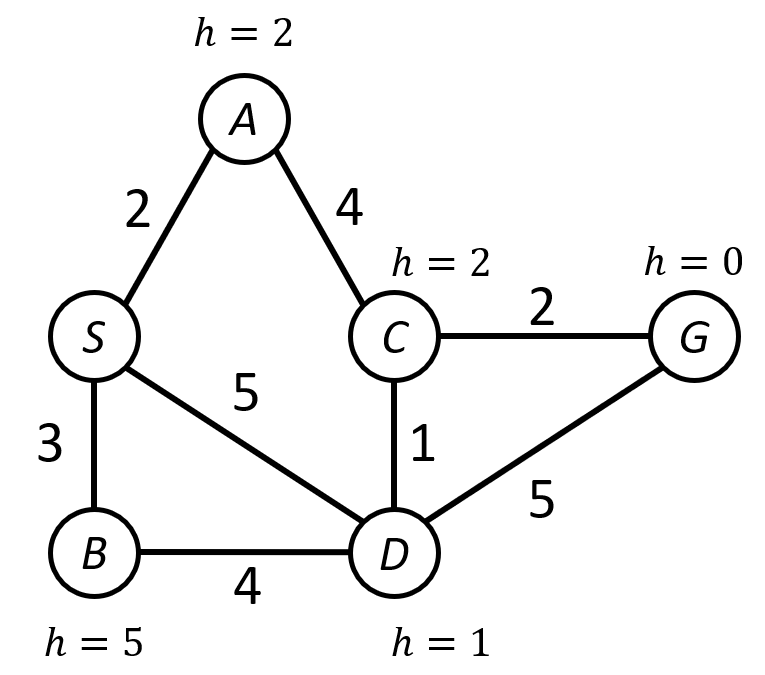

1. List out the ordering of the states expanded as well as the solution (as a state sequence) returned by DFS, BFS, UCS, and A*. Assume that DFS and BFS use the early goal test. Assume that all algorithms use a reached table.

2. Change exactly one heuristic value so that A* returns a suboptimal solution. Give the value of the heuristic you changed, and list out the new ordering of states expanded and the solution sequence returned.

ENTER YOUR RESPONSES HERE

1. DFS. Expanded: S, A, C, G. Solution: S -> A -> C -> G.

   BFS. Expanded: S, A, B, D, G. Solution: S -> D -> G.

   UCS. Expanded: S, A, B, D, C, G. Solution: S -> A -> C -> G.

   A*. Expanded: S, A, D, B, C, G. Solution: S -> A -> C -> G.

2. Change A's heuristic value to h=20 (i.e. any large number greater than h=4 so that A's f value > D=1+5=6). Expanded: S -> D -> B -> C -> G. Solution: S -> D -> C -> G. 

# Problem 3: Word Ladder

In this assignment you will implement and use search algorithms to solve [word ladder](https://en.wikipedia.org/wiki/Word_ladder) puzzles. Given two English words, the goal is to transform the first word into the second word by changing one letter at a time. The catch is that each new word in the process must also be an English (dictionary) word. The following function encodes this process using the [pyenchant](https://pypi.org/project/pyenchant/) package. We use this package to implement the ```successors``` function, which returns viable successor words during search.

In [78]:
# RUN THIS ONCE IN THE BEGINNING TO INSTALL PYENCHANT
!pip install pyenchant
!apt-get install libenchant1c2a

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libenchant1c2a is already the newest version (1.6.0-11.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [79]:
import enchant, string

def successors(state):
  """
  Given a word, find all possible English word results from changing one letter.
  Return a list of (action, word) pairs, where action is the index of the
  changed letter.
  """
  d = enchant.Dict("en_US")
  child_states = []
  for i in range(len(state)):
    new = [state[:i]+x+state[i+1:] for x in string.ascii_lowercase]
    words = [x for x in new if d.check(x) and x != state]
    child_states = child_states + [(i, word) for word in words]
  return child_states

Below is a partial implementation of `depth_limited_dfs`, which (as the name suggests) is depth-limited depth-first search. It takes in as arguments the starting state (a word), goal state (a word), and a maximum tree depth `depth`. Nodes that are at `depth` in the tree are considered to be leaves (regardless of whether they actually have children). When finished, the procedure returns either a node containing the goal state or ```None```, along with the frontier's maximum size and number of nodes expanded. The latter two quantities are continually updated during the search process. Some more implementation details:

*   Nodes are implemented as Python dictionaries. A node contains three components: the state, the node's parent node, and the cumulative cost (which is equal to the node's depth in the search tree, with the start state at depth 0).
*   The frontier is implemented as a list of nodes.
*   The reached list is implemented as a list of states.

## Coding 1 (15 points)

Make sure you understand the description above, as well as the partial implementation given to you below. Then complete the loop portion of `depth_limited_dfs` where indicated. Some hints:

*   Since the frontier is implemented as a list, elements are ordered. To pop the last element, you can use `pop(-1)`.
*   The "early goal test" can be used to make search more efficient, and this can simply check string equality with the goal state.
*   Use the provided ```expand``` function for node expansion.
*   A child node should only be added to the frontier if it is not in `reached` AND if its depth in the tree is less than or equal to `max_depth`.
*   Remember to appropriately update ```max_frontier``` and ```nodes_expanded``` whenever one of these quantities changes.


In [80]:
def depth_limited_dfs(state, goal, depth):
  """
  Inputs: Initial state, goal state, max tree depth at which to search
  Returns node containing goal or None if no goal found, max frontier size, 
  and total nodes expanded
  """
  node = {'state':state, 'parent':None, 'cost':0}
  frontier = [node]
  reached = [state]
  max_frontier = 1
  nodes_expanded = 0
  if node['state'] == goal:
    return node, max_frontier, nodes_expanded

  while frontier:
  # YOUR CODE HERE
    current = frontier.pop(-1) # pop frontier node
    if current['state'] == goal:
        return current, max_frontier, nodes_expanded
    children = expand(current) # expand(node)
    nodes_expanded = nodes_expanded + 1
    for child in children:
      if child['state'] not in reached and current['cost'] < depth: # how to deal w max depth? 
        reached.append(child['state'])
        frontier.append(child) # add children that satisify condition to frontier
        max_frontier = max(len(frontier),max_frontier) # update max_frontier

  return None, max_frontier, nodes_expanded

def expand(node):
  """
  Given a node, return a list of successor nodes
  """
  state = node['state']
  children = []
  for successor in successors(state):
    children.append({'state':successor[1], 'parent':node, 'cost':node['cost']+1})
  return children

Once you have successfully implemented your search algorithm, you should be able to use it to successfuly solve simple word ladder puzzles. The functions below will help format the solution, if one exists. 

In [81]:
def sequence(node):
  words = [node['state']]
  while node['parent'] is not None:
    node = node['parent']
    words.insert(0, node['state'])
  return words

def results(solution):
  if solution[0] is not None:
    words = sequence(solution[0])
  else: words = "No solution!"
  print(words)
  print("Total cost:", len(words)-1)
  print("Max frontier size:", solution[1])
  print("Nodes expanded:", solution[2])
  print("")

In [82]:
depth_limit = 8
results(depth_limited_dfs('cat', 'cop', depth_limit))
results(depth_limited_dfs('warm', 'cold', depth_limit))

['cat', 'cay', 'cry', 'wry', 'why', 'who', 'woo', 'wop', 'cop']
Total cost: 8
Max frontier size: 75
Nodes expanded: 43

No solution!
Total cost: 11
Max frontier size: 69
Nodes expanded: 1326



## Response 1 (5 points)

Run the preceding cell to solve the two different word ladder puzzles, and try different values of depth limits. Experiment with both lower and higher values (you may also want to try several runs for the same depth limit, as the numbers may differ each time due to tie-breaking behavior). What do the results tell you about the optimality of the solutions? What do you notice about the number of nodes expanded as the depth limit changes?

Generally, optimality can be understood by three measures: # nodes expanded, # nodes put in frontier, and total cost.

For different depth limits, using cat->cop, an increase in depth limit sometimes increases the number of nodes expanded. For example, when depth_limit = 8, nodes expanded = 43; when depth_limit = 32, nodes expanded = 157. However, this trend is not exact as, for example, at a depth limit of 4, nodes expanded = 50 –– which is greater than the nodes expanded for depth limit = 8.

For the same depth limit of 16, cat->cop gave nodes expanded = 317 & total cost = 16. warm->cold gave nodes expanded = 1493 & total cost = 16. For the depth limit of 32, cat->cop gave nodes expanded = 157 & total cost = 32. warm->cold gave nodes expanded = 1441 & total cost = 29. It seems like larger the word, at a certain depth limit, the more nodes expanded.

These results do not maintain any clear trends, thus supporting the statement that DFS is very unstable and hard to predict. This method doesn't produce the most optimal solution. An optimal solution reaches the goal state while maximizing least cost. The cost and optimality of the solution should not depend on the depth limit, but an increase in depth limit usually causes the solution to be longer with more words in the reached set. However, as depth limit increases, the number of nodes expanded only sometimes increases. 



## Coding 2 (10 points)

Since we have a DFS implementation that can account for depth limits, a natural extension would be an iterative deepening wrapper around it. Recall that this algorithm repeatedly calls `depth_limited_dfs` with a larger `depth` parameter each time, starting at 0. To prevent this from potentially searching forever, `iterative_deepening` will stop and return no solution if one is not found by `max_depth`.

As with `depth_limited_dfs`, `iterative_deepening` should also update and return quantities indicating `max_frontier` size and number of `nodes_expanded`. Think carefully about how to update these quantities using what `depth_limited_dfs` returns in each iteration.

In [83]:
def iterative_deepening(start, goal, max_depth):
  """
  Iterative deepening search up to max_depth
  Calls depth_limited_dfs with increasing max depth
  """
  max_frontier = 0
  nodes_expanded = 0

  for i in range (0,max_depth+1):
    node, mf, ne = depth_limited_dfs(start, goal, i)
    max_frontier = max(max_frontier, mf) 
    nodes_expanded = nodes_expanded + ne
    if node is not None and node['state'] == goal:
      return node, max_frontier, nodes_expanded

  return None, max_frontier, nodes_expanded

In [84]:
results(iterative_deepening('cat', 'cop', 5))
results(iterative_deepening('warm', 'cold', 5))

['cat', 'cap', 'cop']
Total cost: 2
Max frontier size: 39
Nodes expanded: 72

['warm', 'wart', 'wort', 'word', 'wold', 'cold']
Total cost: 5
Max frontier size: 44
Nodes expanded: 1583



## Response 2 (5 points)

Use your implementation to find the optimal solutions to both the word ladder puzzles above. Suppose `max_depth` in `iterative_deepening` is equal to `n` when the optimal solution is found. Would using a higher value of `max_depth` change the optimality or efficiency of the search? Why or why not?

Efficiency is in regards to the number of nodes expanded. Optimality is in regards to the total cost. A higher value of max_depth would not change the optimality or efficiency of the search. Recall, that iterative deepening causes a gradual increase in the depth. This ensures that the search method will always return the solution at the earliest instance found and, thus, the optimal depth for the problem. Thus, an increase in max_depth will not change the optimality or efficiency of the search. No matter the max_depth, the method will terminate when the depth_limited_dfs calls the value depth equal to the depth of the solution.



## Coding 3 (5 points)

Your iterative deepening implementation, like all uninformed search approaches, uses no information about the goal word. But we should use this knowledge to our advantage. It makes sense to "favor" successor words that look more like the goal. We can do this using A* search, and a suitable heuristic would be the Hamming distance between a current word and the goal, or the number of indices where the corresponding letters are different.

Implement the Hamming distance function below. It takes in two strings of equal length and returns the number of corresponding letter pairs that are different.

In [85]:
def hamming(state, goal):
# YOUR CODE HERE
    # count up from zero
    difference = 0 
    # go through each index of the string
    for i in range(len(state)):
        # difference count + 1 if letters aren't equal
        if state[i] != goal[i]:
            difference += 1
    # return # of different letter pairs
    return difference

hamming("state","sates")

# NOTE: source citation –– learned more about Hamming distance formula from this site
# http://claresloggett.github.io/python_workshops/improved_hammingdist.html


4

## Coding 4 (15 points)

A* search will mostly follow the implementation of depth-first search above, with a few changes that appear in the pseudocode from lecture. 

First, we will use a [heapq](https://docs.python.org/3.0/library/heapq.html) to implement the frontier as a priority queue (look up the necessary functions for pushing into and popping from the heap). The frontier contains tuples of the form (priority, id, node), and they are sorted in order of increasing priority. Nodes with the same priority are then sorted according to their id.

The `reached` structure is now a *dictionary* with each key as a state and the value as the cheapest node reaching that state. Even if a state already exists in `reached`, a cheaper path to it may be discovered later, and so a cost comparison should be done when determining whether a child node should be added to the frontier.

Finally, remember to conduct the goal test only when *popping* a node from the frontier---the "early" version should not be used.

In [86]:
from heapq import heappush, heappop

def astar_search(state, goal):
  """
  Inputs: Initial state, goal state
  Returns node containing goal or None if no goal found, max frontier size, 
  and total nodes expanded
  """
  node = {'state':state, 'parent':None, 'cost':0}
  frontier = []
  heappush(frontier, 
           (node['cost'] + hamming(node['state'], goal), id(node), node))
  reached = {state: node}
  max_frontier = 1
  nodes_expanded = 0

  while frontier:
  # YOUR CODE HERE
    c_cost, c_id, current = heappop(frontier)
    if current['state'] == goal:
        return current, max_frontier, nodes_expanded
    children = expand(current)
    nodes_expanded = nodes_expanded + 1
    for child in children:
      if child['state'] not in reached.keys() or child['cost'] < reached[child['state']]['cost']: 
        reached[child['state']] = child
        heappush(frontier, (child['cost'] + hamming(child['state'], goal), id(child), child))
        max_frontier = max(len(frontier),max_frontier) # update max_frontier

  return None, max_frontier, nodes_expanded

And that's it for coding! The code below will test and verify the correctness of your A* implementation. As before, you may want to run it a couple times to get a sense of performance independent of tie-breaking behavior.

In [87]:
results(astar_search('cat', 'cop'))
results(astar_search('warm', 'cold'))
results(astar_search('large', 'small'))

['cat', 'cap', 'cop']
Total cost: 2
Max frontier size: 38
Nodes expanded: 2

['warm', 'worm', 'corm', 'cord', 'cold']
Total cost: 4
Max frontier size: 33
Nodes expanded: 5

['large', 'sarge', 'serge', 'verge', 'verse', 'terse', 'tease', 'cease', 'chase', 'chose', 'whose', 'whole', 'whale', 'shale', 'shall', 'small']
Total cost: 15
Max frontier size: 925
Nodes expanded: 1655



## Response 3 (5 points)

Is your A* implementation optimal? How do you know? Compare the search efficiency (in terms of nodes expanded) of the first two word ladder problems with the results returned by iterative deepening search, and explain any differences that you see.

This A* implementation is optimal because the heuristic function is admissable and all ancestors of the goal are expanded before the goal. We know that the heuristic ℎ is admissible if 0≤ ℎ(𝑛)≤ ℎ∗(𝑛) where ℎ∗(𝑛) is the true cost from 𝑛 to goal. In this case, the cost calculated by the heuristic function is the hammable function.

The A* implementation is the golden standard and optimal. This method is much more efficient than the depth_limited_search and iterative_dfs. This is clear due to the fact that the number of nodes expanded for each test case is much smaller in the A* implementation than in the first two methods. This is due to the fact that the heuristic function (using the hammable function) guides us to pick nodes in the frontier that have a higher probability of being closer to the goal, thus helping us expand a smaller number of nodes than the other functions. The A* implementation doesn't select nodes randomly for expansion, whereas depth limited DFS and iterative deepening are both uninformed searches that don't know about the environment.



# Submission

Prior to submitting your homework, do a clean run of all cells by clearing all outputs and restarting and rerunning the whole notebook. Make sure that all outputs are what you expect them to be and that everything is error-free. Then save your notebook, including all outputs. Then save and download your notebook, including all outputs, and submit the assignment by uploading the notebook to Gradescope.